In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import wave as w
import utils as ut
import plotter
import numba_functions as nbf
import numba as nb
from copy import deepcopy
from scipy.optimize import brentq
import pickle

In [2]:
def build_assay_wave(id_, r0, D, alpha, beta, gamma=0.5, cutoff=1):
    dx = ut.lin_from_two_points(np.log(r0), np.log(0.02), 0.001, np.log(3), 0.008)
    dt = ut.dt_from_cfl(0.03, D, dx)

    p = w.Vwave_pars(id_, tot_time=400, dt=dt, dx=dx, 
                     n_x_bins=int( ut.lin_from_two_points(r0, 0.01, 3, 1, 80)/dx ), 
                     M=5, r0=r0, D_coef=D, beta=beta, alpha=alpha, gamma=gamma,
                     Nh=10**12, N0=10**10, cutoff=cutoff,
                     t_burn=ut.lin_from_two_points(r0, 0.01, 200, 1, 15000), 
                     t_burn_cutoff=ut.lin_from_two_points(r0, 0.01, 70, 1, 1000), 
                     back_width_fract=ut.lin_from_two_points(np.log(r0), np.log(0.0075), 0.1, np.log(1), 3),
                     traj_step=int(10/dt), check_step=int(100/dt), traj_after_burn=True, verbose=True)
    return w.Vwave(p)

## FKPP regime

In [3]:
r0 = 0.0217
D_coef = 1e-5
b_zero = 2
a_list = np.linspace(0.75, 1.25, 25)
b_list = np.sqrt(a_list)*b_zero

In [27]:
assays = []
for i in range(len(a_list)):
    assays.append(build_assay_wave(i, r0, D_coef, a_list[i], b_list[i]))

In [ ]:
waves = ut.multiprocess_sim(assays, 2)

In [6]:
# Save on pickle
#f = open('data/virulence_speed_assays.pickle', 'wb')
#pickle.dump(waves, f)
#f.close()

In [7]:
# Load from pickle
f = open('data/virulence_speed_assays.pickle', 'rb')
waves = pickle.load(f)
f.close()

In [8]:
speeds = []
for i in range(len(a_list)):
    speeds.append(np.mean(waves[i].traj.speed(15)[-50:]))

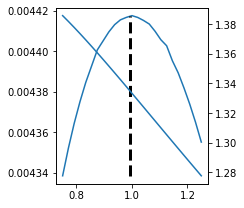

In [9]:
fig, ax1 = plt.subplots(figsize=(3.5,3))
ax2 = plt.twinx(ax1)

ax1.plot(a_list, speeds)
ax1.plot(np.ones(2)*0.991701976619518, [min(speeds), max(speeds)], c='k', ls='--', lw=3)

ax2.plot(a_list, b_zero*np.sqrt(a_list)/(a_list+0.5))
plt.tight_layout()
plt.savefig('plots/speed_fitn_virulence_FKPP.svg')

## linear-fitness regime

In [10]:
r0 = 2.2993164891338513
D_coef = 1e-5
b_zero = 2
a_list2 = np.linspace(0.5, 0.85, 15)
b_list2 = np.sqrt(a_list2)*b_zero

In [33]:
assays = []
for i in range(len(a_list2)):
    assays.append(build_assay_wave(i, r0, D_coef, a_list2[i], b_list2[i]))

In [ ]:
waves2 = ut.multiprocess_sim(assays, 2)

In [35]:
# Save on pickle
#f = open('data/virulence_speed_assays2.pickle', 'wb')
#pickle.dump(waves2, f)
#f.close()

In [11]:
# Load from pickle
f = open('data/virulence_speed_assays2.pickle', 'rb')
waves2 = pickle.load(f)
f.close()

In [29]:
speeds2 = []
for i in range(len(a_list2)):
    speeds2.append(np.mean(waves2[i].traj.speed(30)[-500:]))

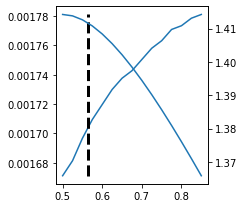

In [30]:
fig, ax1 = plt.subplots(figsize=(3.5,3))
ax2 = plt.twinx(ax1)

ax1.plot(a_list2, speeds2)
ax1.plot(np.ones(2)*0.5638232490519046, [min(speeds2), max(speeds2)], c='k', ls='--', lw=3)

ax2.plot(a_list2, b_zero*np.sqrt(a_list2)/(a_list2+0.5))
plt.tight_layout()

plt.savefig('plots/speed_fitn_virulence_linfit.svg')